In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_name = "online_retail_1"
# data_name = "online_retail_2"

In [3]:
data_path = f"../../data/raw/{data_name}.csv"

In [4]:
processed_path = f"../../data/processed/{data_name}_processed.csv"

In [5]:
df = pd.read_csv(data_path, encoding="latin1")

In [6]:
# df2 = pd.read_csv(data_path, encoding="latin1")


# df2["InvoiceDate"] = pd.to_datetime(df2["InvoiceDate"], dayfirst=True)

# df2["date_block_num"] = (df2["InvoiceDate"].dt.year - 2010) * 12 + (
#     df2["InvoiceDate"].dt.month - 1
# )

# df2["shop_id"] = 0
# df2["item_id"] = df2["StockCode"].astype("category").cat.codes

# df2_new = (
#     df2.groupby(["InvoiceDate", "date_block_num", "shop_id", "item_id"])
#     .agg({"UnitPrice": "mean", "Quantity": "sum"})
#     .reset_index()
# )

# df2_new.rename(
#     columns={
#         "InvoiceDate": "date",
#         "UnitPrice": "item_price",
#         "Quantity": "item_cnt_day",
#     },
#     inplace=True,
# )

# df2_new["date"] = df2_new["date"].dt.strftime("%d.%m.%Y")
# df = df2_new.copy()

In [7]:
df['sales_amount'] = df['item_price'] * df['item_cnt_day']

In [8]:
items_group = df.groupby(df['item_id'])
items = items_group[["item_price", "item_cnt_day", "sales_amount"]].mean().reset_index()

In [9]:
print(items.describe().round(2))

        item_id  item_price  item_cnt_day  sales_amount
count  21807.00    21807.00      21807.00      21807.00
mean   11098.70      823.89          1.09        931.41
std     6397.06     2784.20          0.93       3352.20
min        0.00        4.91         -1.38     -10398.00
25%     5551.50      186.54          1.00        188.00
50%    11105.00      322.36          1.00        338.75
75%    16647.50      850.00          1.03        899.00
max    22169.00   307980.00         65.47     307980.00


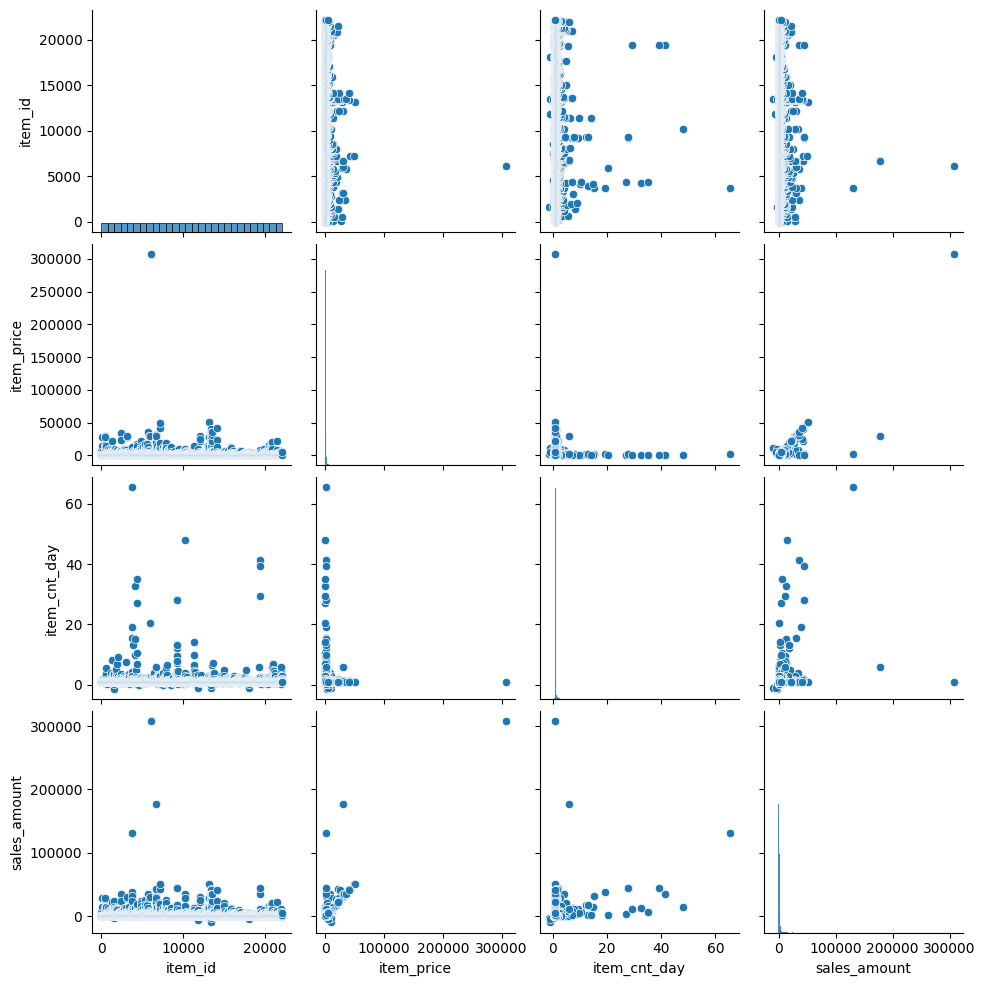

In [10]:
sns.pairplot(items[["item_id", "item_price", "item_cnt_day", "sales_amount"]])

In [11]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean


numeric_cols = ["item_price", "item_cnt_day", "sales_amount"]
items_iqr = remove_outliers_iqr(items, numeric_cols)

In [12]:
df_filtered = items_iqr[items_iqr["sales_amount"] > 0]

print(df_filtered.describe().round(2))

        item_id  item_price  item_cnt_day  sales_amount
count  14767.00    14767.00      14767.00      14767.00
mean   11317.83      322.76          1.01        325.28
std     6293.01      248.96          0.02        251.22
min        0.00        7.00          0.96          7.00
25%     6226.50      145.48          1.00        146.67
50%    11447.00      249.00          1.00        249.00
75%    16884.50      398.00          1.00        399.00
max    22168.00     1184.00          1.07       1136.62


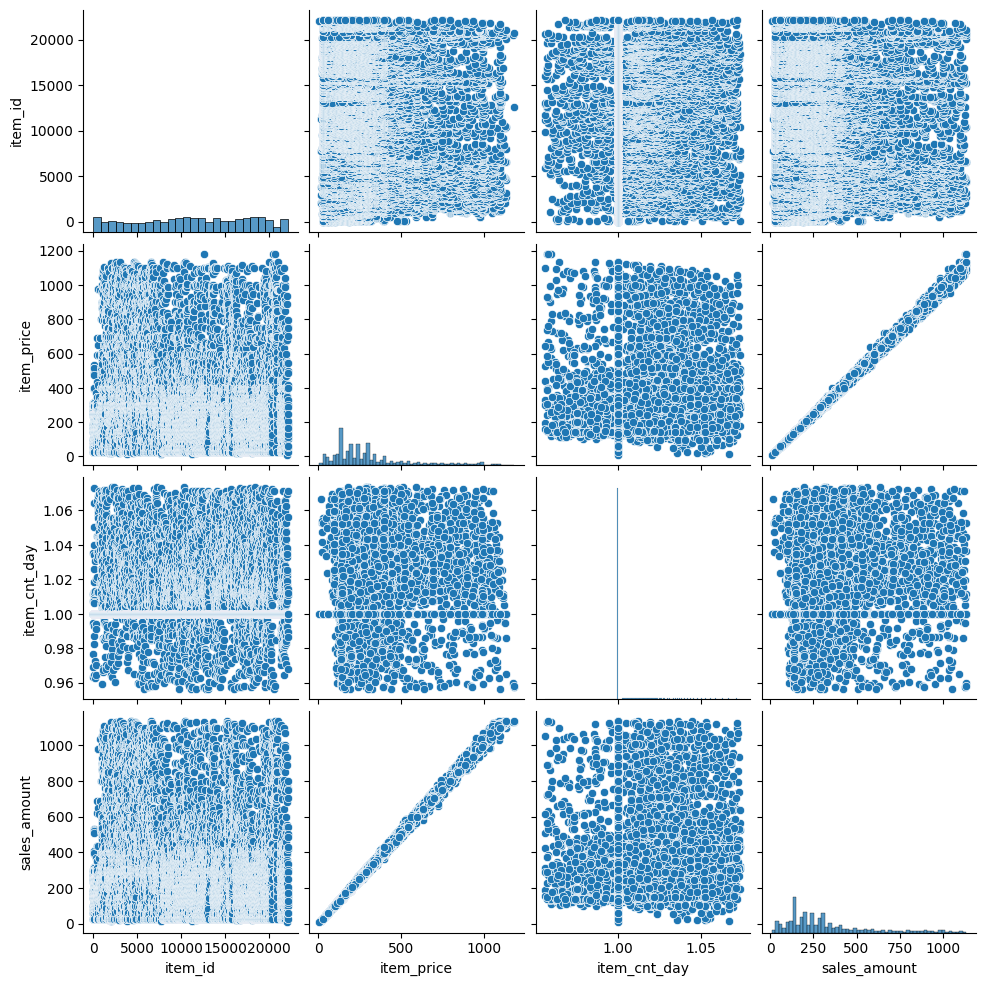

In [13]:
sns.pairplot(df_filtered[["item_id", "item_price", "item_cnt_day", "sales_amount"]])

In [14]:
df_filtered.to_csv(processed_path, index=False)